# UNIVERSIDAD NACIONAL DE CÓRDOBA#
## Fa.M.A.F – Observatorio Astronómico ##
### Licenciatura en Astronomía ###
### Tapia Martina ###
### Astrometría 2020 ###
## Práctico N° 2##

## Actividad 4 ##
### Introducción  ###

Todos los métodos usados hasta aquí usan, de una u otra manera, una distribución normal para los datos. Sin embargo, nunca los datos están distribuidos exactamente de acuerdo con una normal. El procedimiento t es útil en la práctica porque es robusto, es decir, es bastante insensible a desviaciones respecto de la distribución normal por parte de los datos. Aún asi, no se pueden usar los intervalos de confianza (IC) construidos con t si los datos distribuidos tienen un alto valor de skewness (distribuciones con colas), a menos que las muestran sean muy grandes. El método(y varios más)que se describirá a continuación tiene la ventaja de que no necesitan de datos distribuidos normalmente o muestras muy grandes. Además, practicamente carece de fórmulas y funciona de la misma manera para muchas diferentes estadísticas. También permite, con la suficiente potencia computacional,obtener resultados que muchas veces son más exactos que aquellos obtenidos por métodos tradicionales. Es más, los intervalos que se obtienen con las técnicas de remuestreo, son conceptualmente mas simples que los IC y las pruebas basadas en distribuciones normales, debido a que están directamente relacionados con la base del proceso inferencial: las distribuciones muestrales ”muestran” qué debería pasar si se tomaran muchas muestras bajo las mismas condiciones.

El **objetivo** de ésta actividad es diseñar, impementar y verificar una función, que estime la varianza de una variable aleatoria (V.A) a partir de una muestra de datos. La muestra utilizada es de magnitudes de cúmulos globulares. Luego, se quiere implementar una función que utilize el Método de boostrap resampling para calcular los intervalos de confianza del estimador de la varianza con un nivel de significancia dado α. 



### Método de Bootstrap ###

La inferencia estadística se basa en las distribuciones muestrales de una muestra de estadísticos. El método **bootstrap** es, en primer lugar, una manera de encontrar la distribución muestral, al menos aproximadamente, sólo a partir de una muestra. Este es el procedimiento a seguir:
- Remuestreo: Una distribución muestral esta basada en muchas muestras extraídas a partir de una población. Si se tiene una sola muestra aleatoria, se realizan muchos remuestreos, repitiendo el muestreo con repeticiones a partir de la única muestra aleatoria que disponemos. Cada remuestreo debe tener el mismo tamaño que la muestra aleatoria original.
- Distribución **bootstrap**: La distribución muestral de un estadístico colecciona los valores de dicho estadístico proveniente de muchas muestras. La distribución **bootstrap** nos da información acerca de la distribución muestral.

Por lo tanto la idea del **bootstrap** se puede describir de la siguiente manera: La muestra original representa la población a partir de la cuál fue extraída. Por lo que los remuestreos a partir de dicha muestra, representan que se obtendría si tomaramos
muchas muestras extraídas de la población. La distribución **bootstrap** de un estadístico, basada en muchos remuestreos, representa la distribución muestral de dicho estadístico, basado en muchas muestras.

### Intervalos de Confianza (IC)###

Aunque un estimador como la media muestral sea insesgado, consistente y eficiente, lo más probable es que, aún en muestras grandes, el valor del estimador no coincida con el valor del parámetro. Por lo tanto se utiliza otro procedimiento más seguro
para inferir el valor del parámetro, como es la estimación por intervalo. Con este método se construye un intervalo a partir del valor de un estimador puntual, mediante la definición de dos límites: uno superior (LS) y otro inferior (LI). Se supone que el intervalo contiene el parámetro poblacional con cierta probabilidad.
La deducción de un intervalo de confianza para la media poblacional depende de varios aspectos que combinados de cierta manera conforman una situación particular que determina la forma del intervalo. Los aspectos a considerar en la construcción de un
intervalo de confianza son:
- Tipo de distribución de la variable estudiada,
- Conocimiento de la varianza poblacional, y
- Tamaño de la muestra.

In [1]:
#Primero se importan las librerías necesarias para trabajar
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import seaborn as sns          
sns.set()         
from scipy.stats import poisson
import statistics

In [2]:
#Se importan los datos a utilizar
data = np.genfromtxt('cumulos_globulares.dat', usecols=6)
data = data[~np.isnan(data)]

In [3]:
#Lo primero que se calculará es la varianza de la muestra total

n1 =len(data)
xm1 = sum(data)/n1                               #Se calcula el promedio
vT = sum((data - xm1)**2 / (n1 - 1))             
vT                                               #Varianza de la muestra inicial

2.2251897407611687

In [7]:
# Se define el tamaño de la muestra total como n
n = len(data)
def Boot(n = len(data), N = 100):            #Se define una función que remuestree aplicando Boostrap     
    lvar = []                                # Lista vacía donde se guardaran los estimadores 
    for i in range(N):
        mue = np.random.choice(data, size = n)       #Remuestreo de tamaño n
        xm = sum(mue)/n                              #Promedios
        s2 = sum((mue - xm)**2 / (n - 1))            #Varianzas
        lvar.append(s2)
    return(lvar)

In [8]:
#Se hace una lista con los estimadores calculados 
varianzas = Boot()

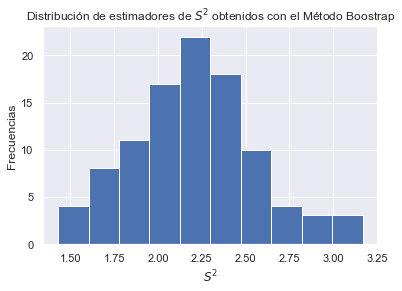

In [16]:
#Se grafica la distribución de los estimadores 

plt.title('Distribución de estimadores de $S^2$ obtenidos con el Método Boostrap')
plt.hist(varianzas)
plt.ylabel('Frecuencias')
plt.xlabel('$S^2$')
plt.show()

A continuación se quiere encontrar el intervalo de confianza IC de los estimadores de varianza con un nivel de significancia $	\alpha$

In [10]:
#Se usa la función sort para ordenar los valores de la lista de menor a mayor.
varianzas.sort()

In [11]:
#Se define una función que encuentre el valor del extremo inferior (q1) del IC.
#Se elije alpha como 0.90

def calq(alp = 0.90, nv= len(varianzas)):
    s = 0
    alp2 = (1 - alp)/2
    for j in range(nv):
        x = varianzas[j]
        s = s + x 
        s2 = s / nv
        
        if s2 <= alp2:
            None 
        else:
            q1 = x
            break
    return(q1)        
        
        

In [12]:
#Se ejecutá la función, y se determina el valor q1
q1 = calq()
q1

1.5882036909358346

In [13]:
#Se ordenan los valores de la lista de estimadores de mayor a menor usando reverse =True

varianzas.sort(reverse=True)

In [14]:
#Se ejecuta nuevamente la función
q2 = calq()
q2

3.1125326116933274

In [15]:
# Luego, se define el intervalo de confianza IC como
IC = (q1, q2)
IC

(1.5882036909358346, 3.1125326116933274)

Finalemnte, el objetivo de ésta actividad pudo llevarse a cabo. Se diseñó una función que estima la varianza de una variable aleatoria a partir de una muestra de datos. Luego, se pudo implementar exitosamente una función que utiliza el Método de boostrap resampling para calcular los intervalos de confianza del estimador de la varianza con un nivel de significancia dado α. 

Se pudo verificar la gran ventaja del método **bootstrap** ya que es una forma sencilla de derivar estimaciones de errores estándar e intervalos de confianza para estimadores de parámetros complejos de la distribución, si bien  en esta actividad se lo aplicó a la varianza, se puede aplicar a cualquier otro párámetro; como puntos percentiles, proporciones, razón de posibilidades y coeficientes de correlación. **Bootstrap** es una forma apropiada de controlar y verificar la estabilidad de los resultados. Aunque para la mayoría de los problemas es imposible conocer el intervalo de confianza verdadero, el bootstrap es asintóticamente más preciso que los intervalos estándar obtenidos utilizando la varianza muestral y supuestos de normalidad. Además, se pudo ver que  es un método conveniente porque evita el costo de repetir el experimento para obtener otros grupos de datos de muestra.